## Denver Crime Data Exploration

This notebook is a data exploration on Denver crime data downloaded from Kaggle, it follows the CRISP-DM process.

In [68]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

p1 = sns.cubehelix_palette(15)
p2 = sns.cubehelix_palette(10)
p3 = sns.cubehelix_palette(24)
p4 = sns.cubehelix_palette(5)

### Data Understanding

This dataset includes criminal offenses in the City and County of Denver for the previous five calendar years plus the current year to date. The data is based on the National Incident Based Reporting System (NIBRS) which includes all victims of person crimes and all crimes within an incident. 

In [12]:
# Import raw data
df = pd.read_csv('./data/crime.csv')
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [13]:
# Data format of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504346 entries, 0 to 504345
Data columns (total 19 columns):
INCIDENT_ID               504346 non-null int64
OFFENSE_ID                504346 non-null int64
OFFENSE_CODE              504346 non-null int64
OFFENSE_CODE_EXTENSION    504346 non-null int64
OFFENSE_TYPE_ID           504346 non-null object
OFFENSE_CATEGORY_ID       504346 non-null object
FIRST_OCCURRENCE_DATE     504346 non-null object
LAST_OCCURRENCE_DATE      159624 non-null object
REPORTED_DATE             504346 non-null object
INCIDENT_ADDRESS          455037 non-null object
GEO_X                     500189 non-null float64
GEO_Y                     500189 non-null float64
GEO_LON                   500189 non-null float64
GEO_LAT                   500189 non-null float64
DISTRICT_ID               504346 non-null int64
PRECINCT_ID               504346 non-null int64
NEIGHBORHOOD_ID           504346 non-null object
IS_CRIME                  504346 non-null int64
IS_TRAFFIC

In [16]:
# Dimension of the dataset
print("# of rows: {}".format(df.shape[0]))
print("# of columns: {}".format(df.shape[1]))

# of rows: 504346
# of columns: 19


In [113]:
# Column names
df.columns
df['OFFENSE_CATEGORY_ID'].unique()

array(['all-other-crimes', 'larceny', 'theft-from-motor-vehicle',
       'traffic-accident', 'drug-alcohol', 'auto-theft',
       'white-collar-crime', 'burglary', 'public-disorder',
       'aggravated-assault', 'other-crimes-against-persons', 'robbery',
       'sexual-assault', 'murder', 'arson'], dtype=object)

After reviewing some basics of the dataset, here are a few questions I would like to investigate:
1. What are the most common offense categories and types in Denver?
2. What are the distribution of offense occurred over time?
3. What are the crime occurrence trend for difference crime categories?
4. What is the average occurrence of crimes on each day in a year?
5. Which neighborhoods in Denver are the safest? Which ones are the most dangerous?

### Prepare Data

There are some necessary data preparation steps need to apply before digging deeper:
1. Investigate missing values
2. Change date format in the dataset
3. Get rid of the uninterested data 

In [18]:
# Missing values of each column in the dataset
df.isnull().sum()

INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      344722
REPORTED_DATE                  0
INCIDENT_ADDRESS           49309
GEO_X                       4157
GEO_Y                       4157
GEO_LON                     4157
GEO_LAT                     4157
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

It seems missing values appears in a few columns: "LAST_OCCURRENCE_DATE", "INCIDENT_ADDRESS", "GEO_X", "GEO_Y", "GEO_LON", "GEO_LAT". It is obvious that these missing date or geographical information can not filled out. Since these columns are not going to be used in the following analysis, I will just leave them as they are.

The next step is to change the data type of "FIRST_OCCURRENCE_DATE" column from object to datetime, and extract "YEAR", "DAY", "DAY_OF_WEEK", "MONTH" AND "HOUR" information from "FIRST_OCCURRENCE_DATE".

In [20]:
df.FIRST_OCCURRENCE_DATE = pd.to_datetime(df.FIRST_OCCURRENCE_DATE)
df["YEAR"] = df.FIRST_OCCURRENCE_DATE.dt.year
df["DAY"] = df.FIRST_OCCURRENCE_DATE.dt.day
df["DAY_OF_WEEK"] = df.FIRST_OCCURRENCE_DATE.dt.dayofweek
df["MONTH"] = df.FIRST_OCCURRENCE_DATE.dt.month
df["HOUR"] = df.FIRST_OCCURRENCE_DATE.dt.hour

In [24]:
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,DAY,DAY_OF_WEEK,MONTH,HOUR
FIRST_OCCURRENCE_DATE,,,,,,,,,,,,,,,,,,,,,
2016-06-15 23:31:00,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,2016-06-15 23:31:00,NaN,6/15/2016 11:31:00 PM,NaN,...,5,521,montbello,1,0,2016,15,2,6,23
2017-10-11 12:30:00,20186000994,20186000994239900,2399,0,theft-other,larceny,2017-10-11 12:30:00,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,...,5,522,gateway-green-valley-ranch,1,0,2017,11,2,10,12
2016-03-04 20:00:00,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,...,3,314,wellshire,1,0,2016,4,4,3,20
2018-01-30 19:20:00,201872333,201872333239900,2399,0,theft-other,larceny,2018-01-30 19:20:00,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,...,3,312,belcaro,1,0,2018,30,1,1,19
2017-06-22 20:53:00,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,2017-06-22 20:53:00,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,...,3,311,cherry-creek,1,0,2017,22,3,6,20


In [26]:
df.index = pd.DatetimeIndex(df["FIRST_OCCURRENCE_DATE"])
print("This dataset ranges from {} to {}".format(df.index.min(), df.index.max()))

This dataset ranges from 2014-01-02 00:00:00 to 2019-08-12 07:22:00


In this dataset, dates of crime occurrence ranges from 2014-01-02 to 2019-08-12. The data of last month, 2019-08, is incomplete, so it should be dropped.

In [28]:
date_before = pd.Timestamp(2019, 8, 1)
df = df[df.FIRST_OCCURRENCE_DATE < date_before]
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,DAY,DAY_OF_WEEK,MONTH,HOUR
FIRST_OCCURRENCE_DATE,,,,,,,,,,,,,,,,,,,,,
2016-06-15 23:31:00,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,2016-06-15 23:31:00,NaN,6/15/2016 11:31:00 PM,NaN,...,5,521,montbello,1,0,2016,15,2,6,23
2017-10-11 12:30:00,20186000994,20186000994239900,2399,0,theft-other,larceny,2017-10-11 12:30:00,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,...,5,522,gateway-green-valley-ranch,1,0,2017,11,2,10,12
2016-03-04 20:00:00,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,...,3,314,wellshire,1,0,2016,4,4,3,20
2018-01-30 19:20:00,201872333,201872333239900,2399,0,theft-other,larceny,2018-01-30 19:20:00,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,...,3,312,belcaro,1,0,2018,30,1,1,19
2017-06-22 20:53:00,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,2017-06-22 20:53:00,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,...,3,311,cherry-creek,1,0,2017,22,3,6,20


In [29]:
# Updated dimension of the dataset
print("# of rows: {}".format(df.shape[0]))
print("# of columns: {}".format(df.shape[1]))

# of rows: 501746
# of columns: 24


### Answer questions based on dataset

* **Offense categories distribution**

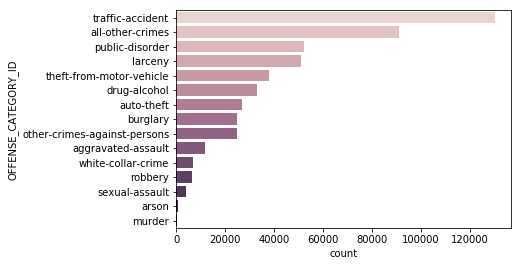

In [115]:
plt.figure()
cat_freq = df.OFFENSE_CATEGORY_ID.value_counts()
sns.countplot(y="OFFENSE_CATEGORY_ID", data=df, order=cat_freq.index, palette=p1)
plt.savefig('offense_categories.png')
plt.show()

From the above plot, it can be inferred that the top three offense categories are: traffic accident, public disorder, and larceny. And murder is the most rare crime.

* **Most and least common offense types excluding traffic accidents**

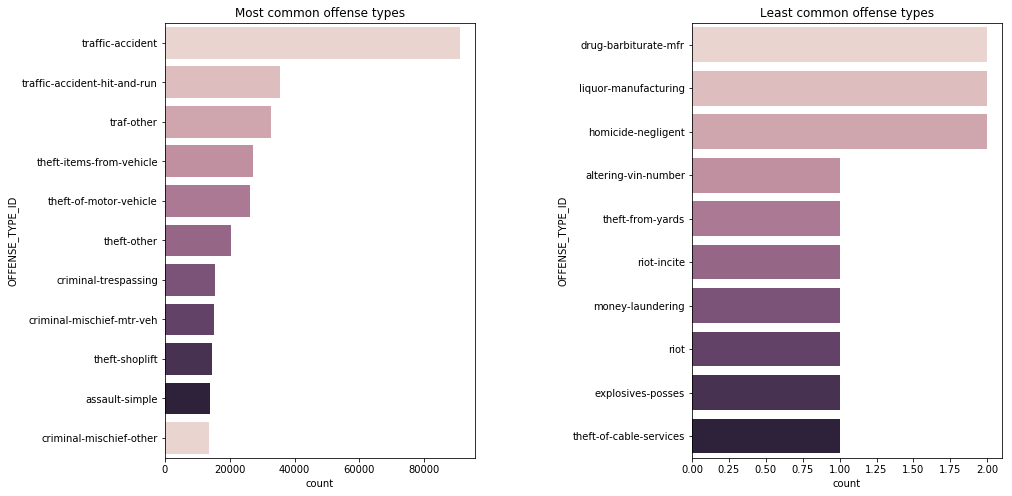

In [116]:
f, axes = plt.subplots(1,2)
f.set_figheight(8)
f.set_figwidth(15)
plt.subplots_adjust(wspace=.7)
type_freq = df.OFFENSE_TYPE_ID.value_counts()
common_types = type_freq.iloc[0:11]
rare_types = type_freq.iloc[-10:]
axes[0].set_title("Most common offense types")
sns.countplot(y="OFFENSE_TYPE_ID", data=df, order=common_types.index, palette=p2, ax=axes[0])
axes[1].set_title("Least common offense types")
sns.countplot(y="OFFENSE_TYPE_ID", data=df, order=rare_types.index, palette=p2, ax=axes[1])
plt.show()

Besides traffic accidents in general, the top three most common offense types are: traffic accident(hit and run), traffic(other), theft from a car. The least common offense type is theft of cable service, it only happened once.

* **All other crimes**

In [120]:
other_crimes['OFFENSE_TYPE_ID'].unique().shape

(69,)

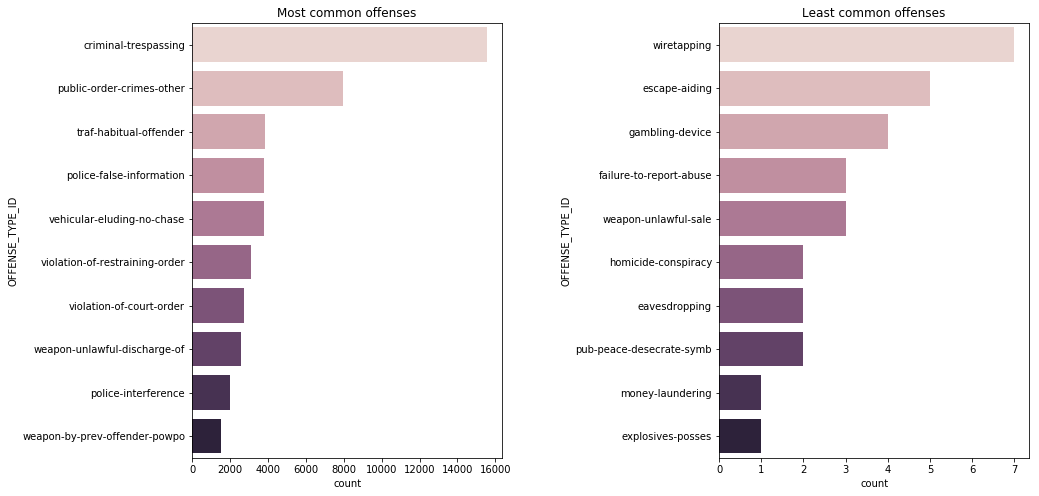

In [64]:
other_crimes = df[df.OFFENSE_CATEGORY_ID == "all-other-crimes"]
other_crimes_freq = other_crimes.OFFENSE_TYPE_ID.value_counts()
f, axes = plt.subplots(1,2)
f.set_figheight(8)
f.set_figwidth(15)
plt.subplots_adjust(wspace=.7)
other_common_types = other_crimes_freq.iloc[1:11]
other_rare_types = other_crimes_freq.iloc[-10:]
axes[0].set_title("Most common offenses")
sns.countplot(y="OFFENSE_TYPE_ID", data=other_crimes, order=other_common_types.index, palette=p2, ax=axes[0])
axes[1].set_title("Least common offenses")
sns.countplot(y="OFFENSE_TYPE_ID", data=other_crimes, order=other_rare_types.index, palette=p2, ax=axes[1])
plt.show()

The above two plots show the most and least common offense types in "All other crimes" offense category.

* **Distribution of crime vs traffic accidents over months**

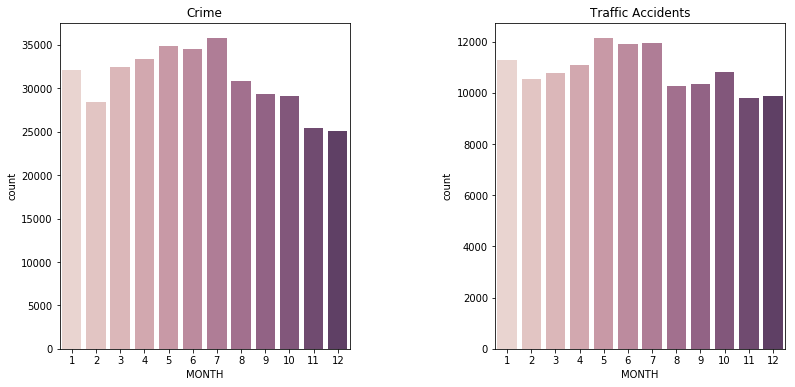

In [59]:
crimes_df = df[df.IS_CRIME==1]
traffic_df = df[df.IS_TRAFFIC==1]

f, axes = plt.subplots(1,2)
f.set_figheight(6)
f.set_figwidth(13)
plt.subplots_adjust(wspace=.5)
axes[0].set_title("Crime")
sns.countplot(x="MONTH", data=crimes_df, palette=p, ax=axes[0])
axes[1].set_title("Traffic Accidents")
sns.countplot(x="MONTH", data=traffic_df, palette=p, ax=axes[1])
plt.show()

For both "Crime" and "Traffic accidents", it seems May, June and July are the month with most offense occurrences.

* **Distribution of crime vs traffic accidents per hour**

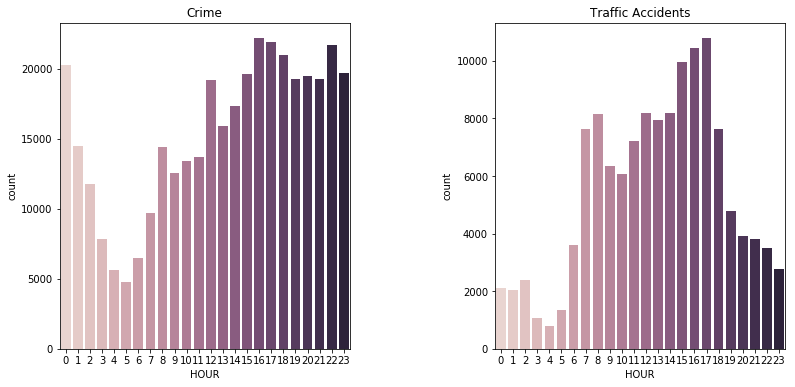

In [107]:
f, axes = plt.subplots(1,2)
f.set_figheight(6)
f.set_figwidth(13)
plt.subplots_adjust(wspace=.5)
axes[0].set_title("Crime")
sns.countplot(x="HOUR", data=crimes_df, palette=p3, ax=axes[0])
axes[1].set_title("Traffic Accidents")
sns.countplot(x="HOUR", data=traffic_df, palette=p3, ax=axes[1])
plt.show()

It can be inferred that most crimes happened at night, and most traffic accidents happened during 4pm to 7pm.

* **Crime occurence trend for different categories of crimes**

/Users/hanbing/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'FIRST_OCCURRENCE_DATE' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


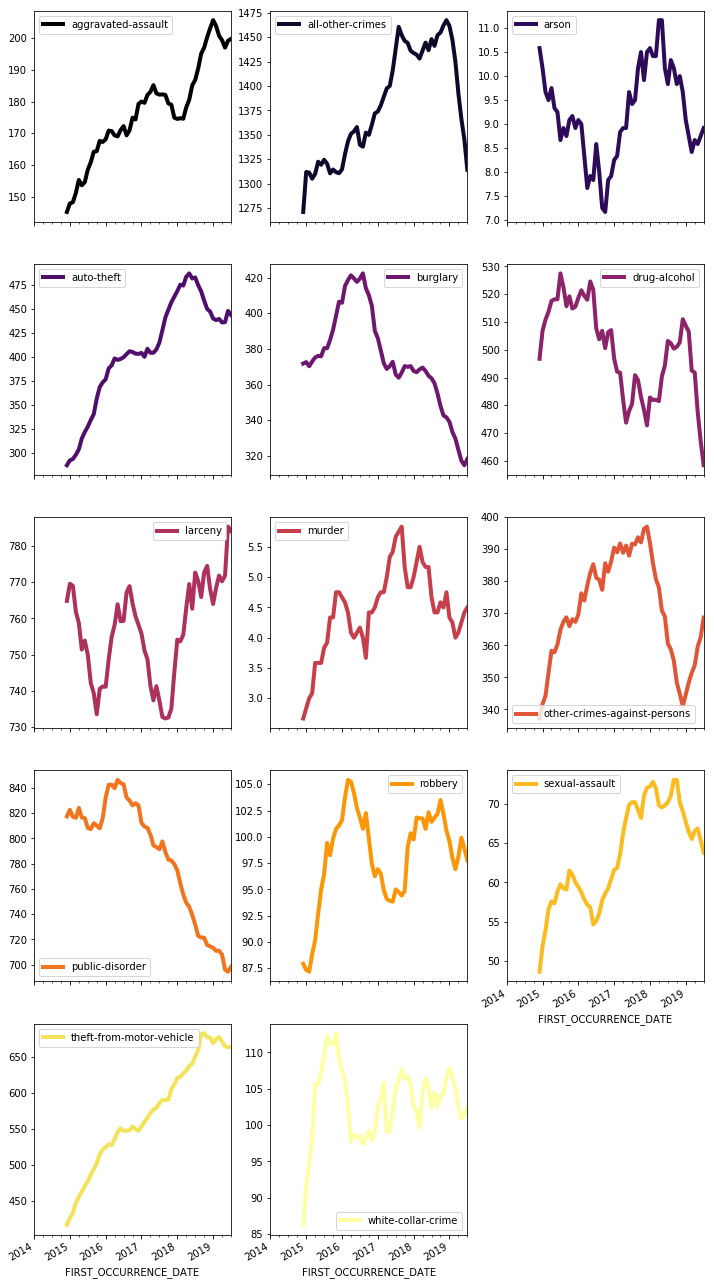

In [85]:
crimes_df.pivot_table(index='FIRST_OCCURRENCE_DATE', columns='OFFENSE_CATEGORY_ID', aggfunc='size', fill_value=0).resample('M').sum().rolling(window=12).mean().plot(figsize=(12,25), linewidth=4, cmap='inferno', subplots=True, layout=(-1, 3))
plt.tick_params(labelsize=16)
plt.show()

* **What is the average occurence of crimes on each day in a year?**

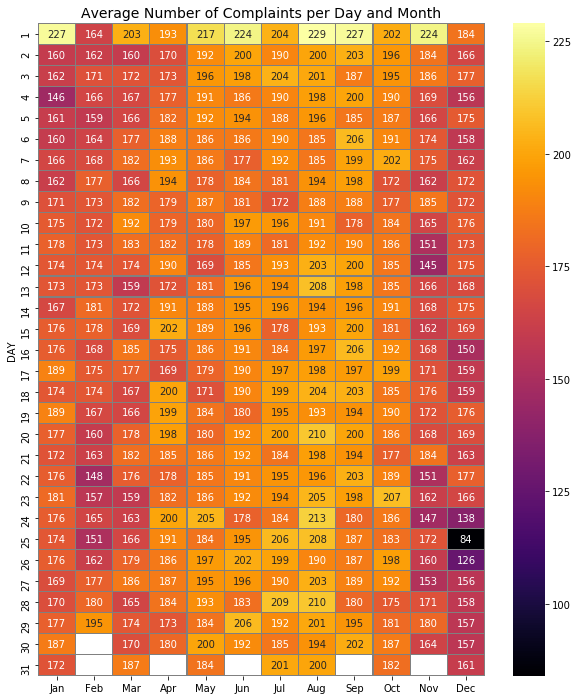

In [83]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
crimes_pt = crimes_df.pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=len)
crimes_pt_year_count = crimes_df.pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))
crimes_avg = crimes_pt / crimes_pt_year_count
crimes_avg.columns = months
plt.figure(figsize=(10,12))
plt.title('Average Number of Complaints per Day and Month', fontsize=14)
sns.heatmap(crimes_avg.round(), cmap='inferno', linecolor='grey',linewidths=0.1, cbar=True, annot=True, fmt=".0f")
plt.show()

* **The safest and the most dangerous neighborhoods**

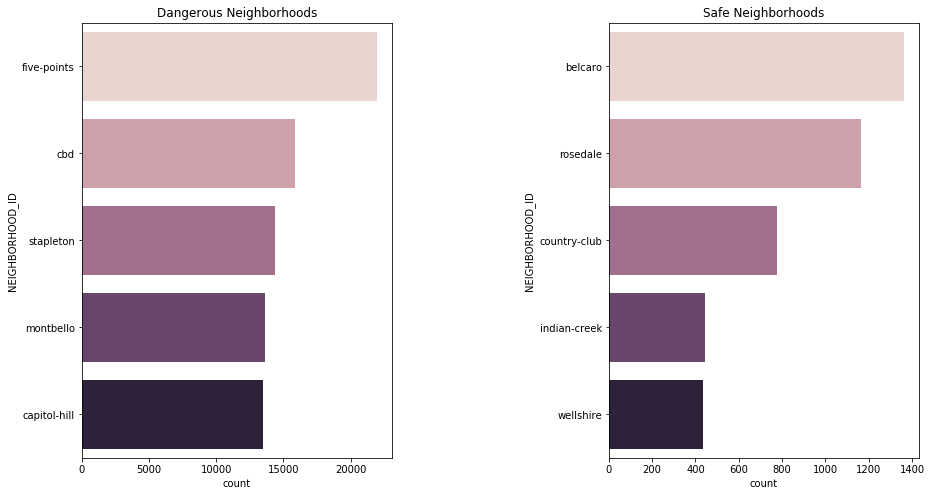

In [86]:
f, axes = plt.subplots(1,2)
f.set_figheight(8)
f.set_figwidth(15)
plt.subplots_adjust(wspace=.7)
neighborhood_freq = crimes_df.NEIGHBORHOOD_ID.value_counts()
dangerous = neighborhood_freq.iloc[:5]
safe = neighborhood_freq.iloc[-5:]
axes[0].set_title("Dangerous Neighborhoods")
sns.countplot(y="NEIGHBORHOOD_ID", data=crimes_df, order=dangerous.index, palette=p4, ax=axes[0])
axes[1].set_title("Safe Neighborhoods")
sns.countplot(y="NEIGHBORHOOD_ID", data=crimes_df, order=safe.index, palette=p4, ax=axes[1])
plt.show()

As a conclusion, Five Points and CBD are the top two most dangerous neighborhoods in Denver, and Wellshire is the safest neighborhood.